In [1]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 클러스터링 알고리즘

## [P.1] MeanShift 알고리즘

연습때와 마찬가지로 `make_blobs` 데이터셋을 통해 [`MeanShift`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) 알고리즘으로 학습하고 시각화해주세요.

In [2]:
from sklearn.datasets import make_blobs

num_classes = 5

X, y = make_blobs(n_samples=1000, n_features=2, centers=num_classes)

print(X.shape, y.shape)

(1000, 2) (1000,)


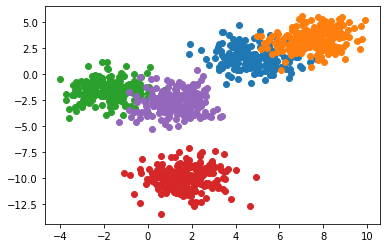

In [3]:
for cls in range(num_classes):
    plt.scatter(X[:, 0][y == cls], X[:, 1][y == cls])

### Q.1 MeanShift 알고리즘의 하이퍼파라미터는 무엇이 있으며, `sklearn` 패키지에서 어떤 argument로 구현되어 있나요?

커널 함수의 모양을 결정 짓는, 편향 분산 trade-off를 결정 지어주는 `bandwidth` 하이퍼파라미터가 있었음.    
그리고 이는 똑같은 이름으로 `sklearn.cluster.MeanShift`에 구현되어 있음.

In [10]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=1.0)
y_pred = meanshift.fit_predict(X)

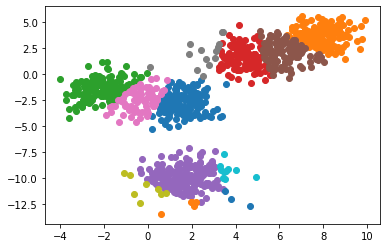

In [11]:
for cls in np.unique(y_pred):
    plt.scatter(X[:, 0][y_pred == cls], X[:, 1][y_pred == cls])

### Q.2 위의 하이퍼파라미터를 조절하며, 값을 키웠을 때와 줄였을 때 결과가 어떻게 변화는지 정리해주세요.

`bandwidth` 값이 작아지면 뾰족한 커널이 형성되어, 더 많은 수의 클러스터가 학습되며 오버피팅 문제를 야기함.    
반대로 값이 커지면 군집 개수가 줄어들며 언더피팅 관련 문제가 발생함.

## [P.2] GMM 알고리즘

이번에는 [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) 모델을 활용해 데이터를 학습해봅시다.

In [36]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)
y_pred = gmm.fit_predict(X)

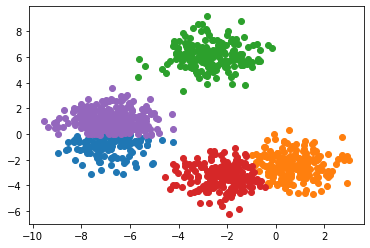

In [37]:
for cls in np.unique(y_pred):
    plt.scatter(X[:, 0][y_pred == cls], X[:, 1][y_pred == cls])

### Q.3 GMM 알고리즘에 대해 설명하고, 다른 알고리즘들과의 비교를 통해 장점과 단점을 정리해주세요.

GMM 모델은 타 알고리즘들과 다르게 모수적 추정 방법론임.    
따라서 데이터가 정규 분포들의 조합으로 생성되었다는 가정이 맞았을 때 정말 좋은 성능을 보여줄 수 있음.    
하지만 반대로 가정이 틀릴 경우, 반대의 상황이 발생할 것임.